# 유한차분법

컴퓨터는 가감승제$(+, -, \times, \div)$의 사칙연산만 가능하다. 하지만 자연과학과 공학의 문제에선 미분항이 포함된 미분방정식을 풀어야 한다. 따라서 미분을 사칙연산으로 변환해서 컴퓨터에 입력해야 컴퓨터를 통한 수치해석이 가능하다. 이것을 실현하는 것이 __Finite Difference Method__ 이다. 

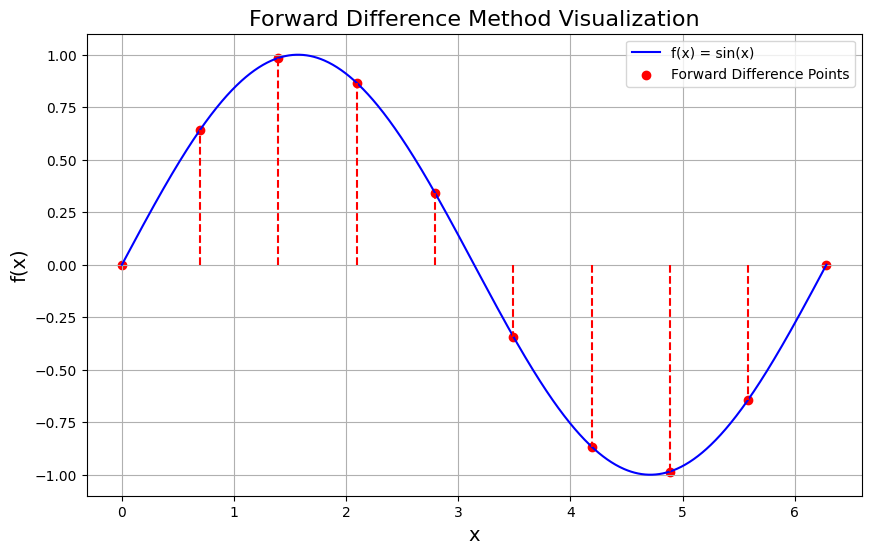

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의 (미분할 함수)
def f(x):
    return np.sin(x)

# 유한차분법으로 1차 도함수를 계산하는 함수
def forward_difference(x, h):
    return (f(x + h) - f(x)) / h

# 유한차분법 시각화: 차분 지점을 함수와 맞닿는 점에서 점선이 중단되도록
x_values = np.linspace(0, 2 * np.pi, 10)  # 차분 지점을 더 적게 설정
h = 0.5  # 스텝 크기

# 원래 함수 값
function_values = f(x_values)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 원래 함수 그리기
x_plot_values = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x_plot_values, f(x_plot_values), label='f(x) = sin(x)', color='blue')

# 유한차분법으로 구한 차분 지점에 수직 점선 그리기 (함수와 맞닿는 점에서 중단)
for i in range(len(x_values)):
    plt.vlines(x=x_values[i], ymin=0, ymax=function_values[i], linestyle='--', color='red')

# 유한차분법으로 구한 미분값 점 표시
plt.scatter(x_values, function_values, color='red', label='Forward Difference Points')

# 그래프 레이블
plt.title('Forward Difference Method Visualization', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


전방차분법, 후방차분법, 중앙차분법으로 나뉜다.  
- 전방차분법은 미분 지점에서 더 큰 값을 참조해 미분계수를 구하는 방법
- 후방차분법은 미분 지점에서 더 작은 값을 참조해 미분계수를 구하는 방법
- 중앙차분법은 미분 지점에서 큰 값과 작은 값을 둘 다 참조하여 미분계수를 구하는 방법

__Forward difference Method__
$$
\frac{df}{dx} \bigg|_j = f'(x)=\frac{f(x+h)-f(x)}{h}+\sigma(h)
$$

__Backward difference Method__  
$$
\frac{df}{dx} \bigg|_j = f'(x)=\frac{f(x)-f(x-h)}{h}+\sigma(h)
$$

__2계 미분 시__

$$
\frac{d^2f}{dx^2} \bigg|_j = f''(x)=\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}+\sigma(h)
$$
  
$$
\frac{d^2f}{dx^2} \bigg|_j = f''(x)=\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}+\sigma(h)
$$

## Forward Difference Method

$$
f(x)=f(a)+f(x-a)f'(a)+\frac{(x-a)^2}{2!} f''(a) + \cdots (1)
\\
f(x+h)=f(x)+f(x+h-x)f'(x)+\frac{h^2}{2!} f''(x) + \frac{h^3}{3!}f'''(x) + \cdots (2)
$$

(2)로부터:
$$
f'(x)=\frac{f(x+h)-f(x)}{h}-\frac{h}{2!}f''(x)-\frac{h^2}{3!}f'''(x)- \cdots
$$

추가적인 미분항을 그냥 오차항으로 만들어도 된다. $-\frac{h}{2!}f''(x)-\frac{h^2}{3!}f'''(x)- \cdots \to \sigma(h)$

오차항의 차수를 늘려 오류를 더 줄일 수도 있다. $\sigma(h^2),\ \sigma(h^3),\ \cdots$

$$
f(x+h)=f_{j+1},\ f(x)=f_j \\
\frac{f(x+h)-f(x)}{h}=\frac{f_{j+1}-f_j}{h} \\
f_{j+1}-f_j = \Delta f_j \\

\frac{\Delta f_j}{h} + \sigma(h)
$$

## Backward Diff. Method

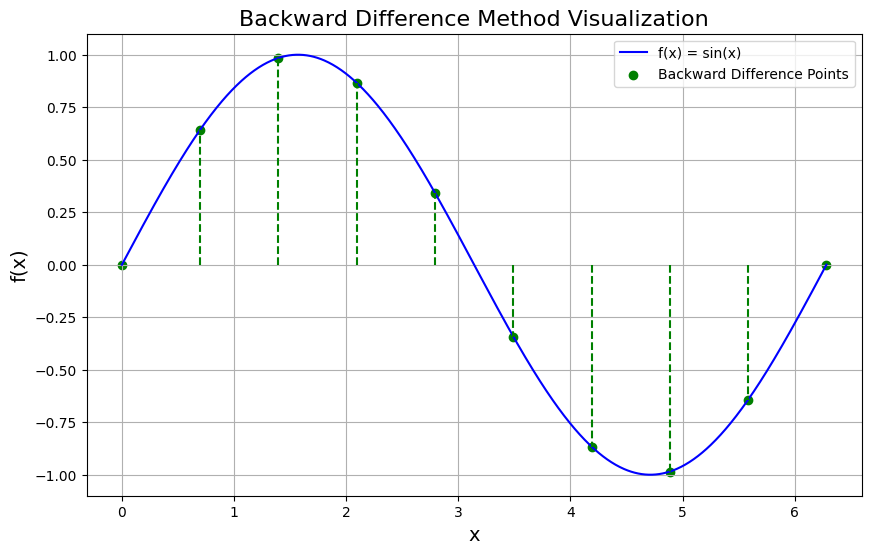

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 후방차분법으로 1차 도함수를 계산하는 함수
def backward_difference(x, h):
    return (f(x) - f(x - h)) / h

# 후방차분법으로 구한 미분값
approx_derivative_backward = backward_difference(x_values, h)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 원래 함수 그리기
x_plot_values = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x_plot_values, f(x_plot_values), label='f(x) = sin(x)', color='blue')

# 후방차분법으로 구한 차분 지점에 수직 점선 그리기 (함수와 맞닿는 점에서 중단)
for i in range(len(x_values)):
    plt.vlines(x=x_values[i], ymin=0, ymax=function_values[i], linestyle='--', color='green')

# 후방차분법으로 구한 미분값 점 표시
plt.scatter(x_values, function_values, color='green', label='Backward Difference Points')

# 그래프 레이블
plt.title('Backward Difference Method Visualization', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


$$
f(x-h)=f(x)+(x-h-x)f'(x) + \frac{(-h)^2}{2!}f''(x) + \frac{(-h)^3}{3!}f'''(x) + \cdots (3)
$$

(3)으로부터:  
$$
f'(x)=\frac{f(x)-f(x-h)}{h}+\frac{h}{2!}f''(x)-\frac{h^2}{3!}f'''(x) + \cdots \\
= \frac{f(x)-f(x-h)}{h}+\sigma(h) \\
= \frac{f_j - f_{j-1}}{h}+\sigma(h) \\
= \frac{\triangledown f_j}{h}+\sigma({h}), where\ \triangledown f_j=f_j - f_{j-1}
$$

## 고차 미분항들에 대한 1계 오차정확도 차분

고계 미분(고차 미분)에 대해 1계 오차 정확도를 가지는 차분(finite difference method)에 대해 설명하겠습니다. 차분법은 수치해석에서 미분 방정식을 근사적으로 풀기 위해 사용되는 방법입니다. 고계 미분 항들에 대해서도 차분법을 적용할 수 있습니다.

### 1. 1계 오차 정확도 차분이란?
1계 오차 정확도는 차분 방법에서 근사 오차가 $O(h)$인 것을 의미합니다. 여기서 $h$는 미세한 스텝 크기(step size)입니다. 즉, 차분을 사용하여 계산된 값이 실제 값과의 차이가 스텝 크기에 비례해 감소하는 경우입니다.

#### 예: 1차 미분에 대한 전방 차분(forward difference) 근사
1차 미분 $ f'(x) $는 전방 차분 방식으로 다음과 같이 근사할 수 있습니다:

$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$

이 식의 오차는 $O(h)$로, 1계 오차 정확도를 가집니다.

---

### 2. 고계 미분에 대한 차분

고차 미분 항들도 차분법으로 근사할 수 있습니다. 다음은 고계 미분에 대해 1계 오차 정확도를 가지는 차분 공식들입니다.

#### 2차 미분에 대한 차분 근사 (1계 오차 정확도)
2차 미분 $ f''(x) $는 다음과 같은 형식으로 근사할 수 있습니다.

$$
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

- 전방 차분과 후진 차분의 조합으로 2차 미분을 근사합니다.
- 이 식은 1계 오차 정확도를 가집니다. 즉, 오차는 $O(h)$입니다.

#### 3차 미분에 대한 차분 근사 (1계 오차 정확도)
3차 미분 $ f^{(3)}(x) $는 다음과 같은 차분 식으로 근사할 수 있습니다.

$$
f^{(3)}(x) \approx \frac{f(x + 2h) - 2f(x + h) + 2f(x - h) - f(x - 2h)}{2h^3}
$$

이 차분 공식 역시 1계 오차 정확도를 가집니다.

#### 4차 미분에 대한 차분 근사 (1계 오차 정확도)
4차 미분 $ f^{(4)}(x) $는 다음과 같이 근사할 수 있습니다.

$$
f^{(4)}(x) \approx \frac{f(x+2h) - 4f(x+h) + 6f(x) - 4f(x-h) + f(x-2h)}{h^4}
$$

- 4차 미분을 구하기 위한 중앙 차분 공식입니다.
- 이 방법 또한 1계 오차 정확도를 가집니다.

---

### 3. 차분 공식 요약

| 미분 차수 $ n $ | 차분 공식 (1계 오차 정확도) |
|------------------|-----------------------------|
| $ f'(x) $      | $ \frac{f(x+h) - f(x)}{h} $ |
| $ f''(x) $     | $ \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} $ |
| $ f^{(3)}(x) $ | $ \frac{f(x+2h) - 2f(x+h) + 2f(x-h) - f(x-2h)}{2h^3} $ |
| $ f^{(4)}(x) $ | $ \frac{f(x+2h) - 4f(x+h) + 6f(x) - 4f(x-h) + f(x-2h)}{h^4} $ |

---

### 4. 결론
1계 오차 정확도를 가지는 차분법은 고차 미분 항들에 대해 사용할 수 있으며, $h$에 대해 선형적으로 수렴합니다. 각 미분 차수에 대해 적절한 차분 공식을 사용하여 근사할 수 있으며, 고차 미분을 다루는 수치해석에서 자주 활용됩니다.

후방 차분(backward difference) 방법을 사용하여 고계 미분 항들에 대한 1계 오차 정확도 차분을 구하는 방법을 설명하겠습니다. 후방 차분은 현재 값과 이전 값을 이용하여 미분을 근사하는 방법입니다.

### 1. 1차 미분에 대한 후방 차분

1차 미분 $ f'(x) $는 후방 차분을 사용하여 다음과 같이 근사할 수 있습니다:

$$
f'(x) \approx \frac{f(x) - f(x-h)}{h}
$$

이 식은 1계 오차 정확도를 가지며, 오차는 $ O(h) $입니다.

---

### 2. 2차 미분에 대한 후방 차분

2차 미분 $ f''(x) $는 후방 차분을 사용하여 다음과 같이 근사할 수 있습니다:

$$
f''(x) \approx \frac{f(x) - 2f(x-h) + f(x-2h)}{h^2}
$$

이 식은 1계 오차 정확도를 가집니다.

---

### 3. 3차 미분에 대한 후방 차분

3차 미분 $ f^{(3)}(x) $는 후방 차분으로 다음과 같이 근사할 수 있습니다:

$$
f^{(3)}(x) \approx \frac{f(x) - 3f(x-h) + 3f(x-2h) - f(x-3h)}{h^3}
$$

이 식 역시 1계 오차 정확도를 가집니다.

---

### 4. 4차 미분에 대한 후방 차분

4차 미분 $ f^{(4)}(x) $는 후방 차분으로 다음과 같이 근사할 수 있습니다:

$$
f^{(4)}(x) \approx \frac{f(x) - 4f(x-h) + 6f(x-2h) - 4f(x-3h) + f(x-4h)}{h^4}
$$

이 식도 1계 오차 정확도를 가집니다.

---

### 5. 후방 차분 공식 요약

| 미분 차수 $ n $ | 후방 차분 공식 (1계 오차 정확도) |
|------------------|-----------------------------------|
| $ f'(x) $      | $ \frac{f(x) - f(x-h)}{h} $ |
| $ f''(x) $     | $ \frac{f(x) - 2f(x-h) + f(x-2h)}{h^2} $ |
| $ f^{(3)}(x) $ | $ \frac{f(x) - 3f(x-h) + 3f(x-2h) - f(x-3h)}{h^3} $ |
| $ f^{(4)}(x) $ | $ \frac{f(x) - 4f(x-h) + 6f(x-2h) - 4f(x-3h) + f(x-4h)}{h^4} $ |

---

### 6. 후방 차분과 전방 차분 비교

- 후방 차분: 현재 값과 이전 값을 사용하여 미분을 근사합니다. 예를 들어 $ f'(x) $를 구할 때 $ f(x-h) $와 $ f(x) $ 사이의 변화를 계산합니다.
- 전방 차분: 현재 값과 이후 값을 사용하여 미분을 근사합니다. $ f(x+h) $와 $ f(x) $를 이용합니다.

두 방법 모두 1계 오차 정확도를 가지며, 특정 상황에 맞게 선택할 수 있습니다. 후방 차분은 특히 경계값 문제에서 유용하게 쓰일 수 있습니다.

---

### 결론

후방 차분은 고계 미분 항들을 1계 오차 정확도로 근사하는 방법 중 하나로, 주어진 함수의 이전 값을 사용하여 미분을 계산합니다. 전방 차분과 동일한 정확도를 가지며, 어떤 상황에서는 경계 값 문제에서 더 적합할 수 있습니다.

## 고계 오차정확도 전방 및 후방차분법

고계 오차 정확도를 가지는 전방 차분법과 후방 차분법에 대해 설명하겠습니다. 여기서 고계 오차 정확도란, 차분 근사에서 오차가 스텝 크기 $ h $에 대해 높은 차수로 감소하는 것을 의미합니다. 즉, 1계 오차는 $ O(h) $로 표현되고, 2계 오차는 $ O(h^2) $, 3계 오차는 $ O(h^3) $로 표현됩니다.

### 1. 전방 차분법
전방 차분은 현재 점과 앞의 점을 사용하여 미분을 근사하는 방법입니다.

#### 1차 미분 (1계, 2계, 3계 오차 정확도)
1차 미분 $ f'(x) $에 대해 전방 차분 근사는 다음과 같이 고계 오차 정확도로 표현할 수 있습니다.

##### 1계 오차 정확도 (Forward difference, 1st-order accuracy):
$$
f'(x) \approx \frac{f(x+h) - f(x)}{h} \quad + O(h)
$$
- 이 식의 오차는 $ O(h) $, 즉 1계 오차입니다.

##### 2계 오차 정확도 (Forward difference, 2nd-order accuracy):
$$
f'(x) \approx \frac{-f(x+2h) + 4f(x+h) - 3f(x)}{2h} \quad + O(h^2)
$$
- 이 식의 오차는 $ O(h^2) $, 즉 2계 오차입니다. 정확도가 더 높습니다.

##### 3계 오차 정확도 (Forward difference, 3rd-order accuracy):
$$
f'(x) \approx \frac{-11f(x) + 18f(x+h) - 9f(x+2h) + 2f(x+3h)}{6h} \quad + O(h^3)
$$
- 이 식의 오차는 $ O(h^3) $, 즉 3계 오차입니다. 스텝 크기에 대해 오차가 더 빠르게 감소합니다.

#### 2차 미분 (1계, 2계, 3계 오차 정확도)

##### 1계 오차 정확도:
$$
f''(x) \approx \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2} \quad + O(h)
$$
- 이 식은 1계 오차를 가집니다.

##### 2계 오차 정확도:
$$
f''(x) \approx \frac{-f(x+3h) + 4f(x+2h) - 5f(x+h) + 2f(x)}{h^2} \quad + O(h^2)
$$
- 2계 오차를 가집니다.

##### 3계 오차 정확도:
$$
f''(x) \approx \frac{2f(x+4h) - 9f(x+3h) + 12f(x+2h) - 7f(x+h) + 2f(x)}{h^2} \quad + O(h^3)
$$
- 이 식은 3계 오차를 가집니다.

---

### 2. 후방 차분법
후방 차분은 현재 점과 이전 점을 사용하여 미분을 근사하는 방법입니다.

#### 1차 미분 (1계, 2계, 3계 오차 정확도)

##### 1계 오차 정확도 (Backward difference, 1st-order accuracy):
$$
f'(x) \approx \frac{f(x) - f(x-h)}{h} \quad + O(h)
$$
- 1계 오차를 가집니다.

##### 2계 오차 정확도 (Backward difference, 2nd-order accuracy):
$$
f'(x) \approx \frac{3f(x) - 4f(x-h) + f(x-2h)}{2h} \quad + O(h^2)
$$
- 2계 오차를 가집니다.

##### 3계 오차 정확도 (Backward difference, 3rd-order accuracy):
$$
f'(x) \approx \frac{11f(x) - 18f(x-h) + 9f(x-2h) - 2f(x-3h)}{6h} \quad + O(h^3)
$$
- 3계 오차를 가집니다.

#### 2차 미분 (1계, 2계, 3계 오차 정확도)

##### 1계 오차 정확도:
$$
f''(x) \approx \frac{f(x) - 2f(x-h) + f(x-2h)}{h^2} \quad + O(h)
$$
- 1계 오차를 가집니다.

##### 2계 오차 정확도:
$$
f''(x) \approx \frac{2f(x) - 5f(x-h) + 4f(x-2h) - f(x-3h)}{h^2} \quad + O(h^2)
$$
- 2계 오차를 가집니다.

##### 3계 오차 정확도:
$$
f''(x) \approx \frac{2f(x) - 7f(x-h) + 12f(x-2h) - 9f(x-3h) + 2f(x-4h)}{h^2} \quad + O(h^3)
$$
- 3계 오차를 가집니다.

---

### 3. 오차 정확도의 의미

- 1계 오차 정확도 $ O(h) $: 스텝 크기 $ h $가 작아질수록 오차는 그에 비례하여 작아집니다.
- 2계 오차 정확도 $ O(h^2) $: 오차가 $ h $의 제곱에 비례하여 감소하므로 더 높은 정확도를 제공합니다.
- 3계 오차 정확도 $ O(h^3) $: 매우 높은 정확도로, 스텝 크기 $ h $에 대해 더 빠르게 오차가 줄어듭니다.

---

### 4. 결론

- 전방 차분법과 후방 차분법 모두 1계, 2계, 3계 오차 정확도를 제공하는 공식들이 있으며, 각 미분에 대해 스텝 크기 $ h $가 줄어들수록 오차도 감소합니다.
- 고계 오차 정확도는 더 높은 정확성을 필요로 할 때 사용되며, 2계 또는 3계 오차 정확도를 선택하면 성능과 정확도 사이에서 균형을 맞출 수 있습니다.
- 전방 차분법은 주로 함수의 미래 값(다음 값)을 기반으로 계산하고, 후방 차분법은 함수의 과거 값(이전 값)을 기반으로 계산하는 방식입니다.

## Central Differencing Method

### 1. 1차 미분에 대한 중앙 차분법

1차 미분 $ f'(x) $는 중앙 차분법을 통해 다음과 같이 근사할 수 있습니다:

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} + O(h^2)
$$

- 이 식은 2계 오차 정확도를 가집니다.
- 전방 차분법 및 후방 차분법에 비해 더 높은 정확도를 제공하며, 오차가 $O(h^2)$로 스텝 크기 $h$의 제곱에 비례해 줄어듭니다.

#### 예시
```r
central_diff <- function(f, x, h = 1e-5) {
  return (f(x + h) - f(x - h)) / (2 * h)
}

f <- function(x) x^2  # 예시 함수: f(x) = x^2
central_diff(f, 2)  # x = 2에서의 1차 미분 값 근사
```

위 예시에서 중앙 차분법을 사용하여 $f(x) = x^2$ 함수의 미분값을 $x = 2$에서 근사할 수 있습니다.

### 2. 2차 미분에 대한 중앙 차분법

2차 미분 $f''(x)$는 다음과 같은 중앙 차분 공식을 통해 근사할 수 있습니다:

$$
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + O(h^2)
$$

- 이 식 역시 2계 오차 정확도를 가집니다.
- 함수 값 $f(x+h)$, $f(x)$, $f(x-h)$을 사용하여 2차 미분을 근사합니다.

#### 예시
```r
central_diff_2nd <- function(f, x, h = 1e-5) {
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h^2)
}

f <- function(x) x^2  # 예시 함수: f(x) = x^2
central_diff_2nd(f, 2)  # x = 2에서의 2차 미분 값 근사
```

위 코드에서 중앙 차분법을 사용해 $f(x) = x^2$ 함수의 2차 미분을 근사할 수 있습니다.

### 3. 고차 미분에 대한 중앙 차분법

고차 미분 항들에 대해서도 중앙 차분법을 적용할 수 있으며, 다음은 3차 및 4차 미분의 중앙 차분 공식입니다.

#### 3차 미분
$$
f^{(3)}(x) \approx \frac{f(x+2h) - 2f(x+h) + 2f(x-h) - f(x-2h)}{2h^3} + O(h^2)
$$

- 3차 미분을 근사하는 공식으로, 2계 오차 정확도를 가집니다.

#### 4차 미분
$$
f^{(4)}(x) \approx \frac{f(x+2h) - 4f(x+h) + 6f(x) - 4f(x-h) + f(x-2h)}{h^4} + O(h^2)
$$

- 4차 미분을 근사하는 공식으로, 역시 2계 오차 정확도를 가집니다.

### 4. 중앙 차분법의 장점

1. 높은 정확도: 중앙 차분법은 전방 차분법이나 후방 차분법에 비해 2계 오차 정확도를 제공하며, $O(h^2)$의 오차율을 가집니다. 이는 스텝 크기 $h$가 작아질수록 오차가 더욱 빠르게 줄어든다는 것을 의미합니다.
  
2. 대칭적 계산: 중앙 차분법은 현재 점을 기준으로 앞과 뒤의 값을 모두 사용하므로, 값이 대칭적으로 취해집니다. 이는 함수가 비교적 매끄럽게 변할 때 더욱 정확한 결과를 제공합니다.

3. 연속적인 미분 가능: 고차 미분 항들(2차 미분, 3차 미분 등)에 대해서도 쉽게 적용할 수 있습니다.

### 5. 중앙 차분법과 전방/후방 차분법 비교

| 차분법 | 공식 (1차 미분) | 오차 정확도 |
|--------|-----------------|-------------|
| 전방 차분법 | $ f'(x) \approx \frac{f(x+h) - f(x)}{h} $ | $ O(h) $ |
| 후방 차분법 | $ f'(x) \approx \frac{f(x) - f(x-h)}{h} $ | $ O(h) $ |
| 중앙 차분법 | $ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} $ | $ O(h^2) $ |

- 전방 및 후방 차분법은 1계 오차 정확도를 가지지만, 중앙 차분법은 2계 오차 정확도를 제공합니다.
- 중앙 차분법은 스텝 크기 $h$가 줄어들 때 오차가 더 빠르게 감소하므로, 많은 수치 해석 문제에서 더 선호되는 방법입니다.

### 결론

중앙 차분법은 함수의 미분값을 계산할 때 전방 차분이나 후방 차분에 비해 더 높은 정확도를 제공합니다. 특히, 미분값을 근사할 때 2계 오차 정확도를 제공하며, 전방 및 후방 차분법과 비교할 때 오차가 더 적습니다. 고차 미분에도 쉽게 적용할 수 있으며, 대칭적이기 때문에 수치적 안정성이 뛰어납니다.

알겠습니다. 파이썬과 C++로 중앙 차분법을 구현한 예시를 제공하겠습니다. 각 언어에서 1차 미분과 2차 미분을 중앙 차분법으로 계산하는 코드를 작성해보겠습니다.

### 1. 파이썬 코드 예시

#### 1차 미분 (중앙 차분법)
```python
def central_diff(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# 예시 함수: f(x) = x^2
def f(x):
    return x**2

x_value = 2
result = central_diff(f, x_value)
print(f"f'({x_value}) = {result}")
```

#### 2차 미분 (중앙 차분법)
```python
def central_diff_2nd(f, x, h=1e-5):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

# 예시 함수: f(x) = x^2
def f(x):
    return x**2

x_value = 2
result = central_diff_2nd(f, x_value)
print(f"f''({x_value}) = {result}")
```

### 2. C++ 코드 예시

#### 1차 미분 (중앙 차분법)
```cpp
#include <iostream>
#include <cmath>

double central_diff(double (*f)(double), double x, double h = 1e-5) {
    return (f(x + h) - f(x - h)) / (2 * h);
}

double f(double x) {
    return x * x;  // 예시 함수: f(x) = x^2
}

int main() {
    double x_value = 2.0;
    double result = central_diff(f, x_value);
    std::cout << "f'(" << x_value << ") = " << result << std::endl;
    return 0;
}
```

#### 2차 미분 (중앙 차분법)
```cpp
#include <iostream>
#include <cmath>

double central_diff_2nd(double (*f)(double), double x, double h = 1e-5) {
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h);
}

double f(double x) {
    return x * x;  // 예시 함수: f(x) = x^2
}

int main() {
    double x_value = 2.0;
    double result = central_diff_2nd(f, x_value);
    std::cout << "f''(" << x_value << ") = " << result << std::endl;
    return 0;
}
```

### 설명

1. **파이썬**과 **C++** 모두 중앙 차분법을 사용하여 1차 미분과 2차 미분을 근사했습니다.
2. 각 코드에서는 $ f(x) = x^2 $ 함수에 대해 $ x = 2 $에서 미분 값을 계산하였습니다.
3. **h**는 스텝 크기를 나타내며, 기본값으로 $1e-5$를 사용하였습니다.
4. 결과적으로 함수의 1차 미분과 2차 미분을 중앙 차분법으로 정확하게 계산할 수 있습니다.

이 코드를 다양한 함수와 변수 값으로 테스트하여 중앙 차분법의 효과를 확인할 수 있습니다.

# 연습문제

## p.34 I-2-1

In [2]:
import numpy as np

x = np.linspace(1, 2, num=6, endpoint=True)
f_x = x ** 2
x, f_x

(array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([1.  , 1.44, 1.96, 2.56, 3.24, 4.  ]))

### 1계 오차 정확도

In [3]:
h = 0.2

def forward_diff_1(f_x, h):
    return (f_x[1] - f_x[0])/h

forward_diff_1(f_x, h)

2.1999999999999997

### 2계 오차 정확도

In [4]:
def forward_diff_2(f_x, h):
    return (-f_x[2] + 4* f_x[1] -3 * f_x[0])/(2*h)

forward_diff_2(f_x, h)

1.9999999999999996

## p.35 I-2-2

In [5]:
x = np.linspace(1, 2, num=6, endpoint=True)
f_x = np.array([2, 1.890238, 1.801366, 1.730403, 1.674744, 1.632112])
true_f_x = np.exp(-x/2) * (1-x) + 2

x, f_x, true_f_x

(array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([2.      , 1.890238, 1.801366, 1.730403, 1.674744, 1.632112]),
 array([2.        , 1.89023767, 1.80136588, 1.73040262, 1.67474427,
        1.63212056]))

### 1계 오차정확도

In [11]:
h = 0.2
print(f"전방차분값: {forward_diff_1(f_x, h)}")
print(f"오차: {forward_diff_1(f_x, h) + 0.606531}")

전방차분값: -0.5488099999999996
오차: 0.057721000000000466


### 2계 오차정확도

In [12]:
print(f"전방차분값: {forward_diff_2(f_x, h)}")
print(f"오차: {forward_diff_2(f_x, h) + 0.606531}")

전방차분값: -0.6010349999999987
오차: 0.005496000000001389


## p.36 I-2-3
__2계 미분계수 구하기__

p.29 (10) 식:  
$$
f''(x) = \frac{f(x+2h)-2f(x+h)+f(x)}{12} - hf'''(x) - \frac{7}{12}h^2f^{(iv)}(x) + \cdots
$$

위 식의 오차: $\sigma(h)$

$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f''(x) + \cdots
$$

$$
f(x+2h) = f(x) + 2hf'(x) + \frac{(2h)^2}{2!}f''(x) + \frac{(2h)^3}{3!}f'''(x) + \cdots
$$

$$
f(x+3h) = f(x) + 3hf'(x) + \frac{(3h)^2}{2!}f''(x) + \frac{(3h)^3}{3!}f'''(x) + \cdots
$$

1계 미분항을 없애기 위해 세번째 식에서 두번째 식에 2를 곱한 식을 뺀다.
$$
f(x+2h) - 2f(x+h) = -f(x) +h^2f''(x) + h^3 f'''(x) + \frac{7h^4}{12}f^{(iv)}(x) + \cdots
$$

마찬가지의 이유로 세번째 식에 2를 곱한 것에서 네번째 식에 3을 곱한 식을 뺀다.
$$
2f(x+2h) - 3f(x+3h) =-f(x) + 3h^2f''(x) + 5h^3f'''(x) + \frac{19h^4}{4}f^{(iv)}(x) + \cdots
$$

$$
f'''(x) = \frac{2f(x+3h)-3f(x+2h)-3f(x+2h)+6f(x+h) - 2f(x)}{2h^3} - \frac{3h^4f^{(iv)(x)}}{2h^3} + \cdots
$$

$$
f''(x) = \frac{-f(x+3h) + 4f(x+2h) -5f(x+h) + 2f(x)}{h^2} + \sigma(h^2)
$$